In [1]:
from IPython.display import Image
from gtfparse import read_gtf
import seaborn as sns
import matplotlib.pyplot as plt

Выравнивание ридов RNA-Seq:

./STAR/STAR/bin/Linux_x86_64_static/STAR --runThreadN 2 --runMode genomeGenerate --genomeDir ./res_star --genomeFastaFiles ./data/ref.fa --sjdbGTFfile ./data/genes.gtf --genomeSAindexNbases 10

./STAR/STAR/bin/Linux_x86_64_static/STAR --runThreadN 2 --genomeDir ./res_star --readFilesIn ./data/SRR453566_1.fastq ./data/SRR453566_2.fastq

Получили выравнивание Aligned.out.sam. Теперь для каждого гена найдем число ридов, выровненных на него:

In [3]:
!htseq-count /media/cocos/'TOSHIBA EXT'/bioinf/Aligned.out.sam /media/cocos/'TOSHIBA EXT'/bioinf/genes.gtf 

42247 GFF lines processed.
100000 alignment record pairs processed.
200000 alignment record pairs processed.
300000 alignment record pairs processed.
400000 alignment record pairs processed.
500000 alignment record pairs processed.
600000 alignment record pairs processed.
700000 alignment record pairs processed.
800000 alignment record pairs processed.
900000 alignment record pairs processed.
1000000 alignment record pairs processed.
1100000 alignment record pairs processed.
1200000 alignment record pairs processed.
1300000 alignment record pairs processed.
1400000 alignment record pairs processed.
1500000 alignment record pairs processed.
1600000 alignment record pairs processed.
1700000 alignment record pairs processed.
1800000 alignment record pairs processed.
1900000 alignment record pairs processed.
2000000 alignment record pairs processed.
2100000 alignment record pairs processed.
2200000 alignment record pairs processed.
2300000 alignment record pairs processed.
2400000 alignmen

YNL174W	244
YNL175C	429
YNL176C	229
YNL177C	369
YNL178W	6101
YNL179C	14
YNL180C	365
YNL181W	182
YNL182C	210
YNL183C	316
YNL184C	0
YNL185C	75
YNL186W	439
YNL187W	55
YNL188W	120
YNL189W	574
YNL190W	784
YNL191W	119
YNL192W	940
YNL193W	97
YNL194C	45
YNL195C	17
YNL196C	15
YNL197C	314
YNL198C	0
YNL199C	216
YNL200C	42
YNL201C	172
YNL202W	34
YNL203C	21
YNL204C	12
YNL205C	0
YNL206C	201
YNL207W	212
YNL208W	601
YNL209W	4341
YNL210W	17
YNL211C	30
YNL212W	305
YNL213C	102
YNL214W	31
YNL215W	181
YNL216W	317
YNL217W	214
YNL218W	106
YNL219C	307
YNL220W	2204
YNL221C	398
YNL222W	82
YNL223W	39
YNL224C	126
YNL225C	116
YNL226W	36
YNL227C	220
YNL228W	98
YNL229C	283
YNL230C	77
YNL231C	511
YNL232W	201
YNL233W	186
YNL234W	26
YNL235C	32
YNL236W	154
YNL237W	61
YNL238W	340
YNL239W	339
YNL240C	154
YNL241C	1427
YNL242W	109
YNL243W	560
YNL244C	787
YNL245C	69
YNL246W	211
YNL247W	690
YNL248C	590
YNL249C	74
YNL250W	111
YNL251C	236
YNL252C	222
YNL253W	91
YNL254C	85
YNL255C	815
YNL256W	429
YNL257C	244
YNL258C	250
YNL259C	

Распределение числа ридов на один ген:

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_id', 'transcript_name', 'transcript_source', 'exon_number', 'exon_id', 'protein_id']


per million scaling factor 1.2449125156705232
Число экспрессирующихся генов: , 5607
Процент экспрессирующихся генов: , 78.68369351669942 %


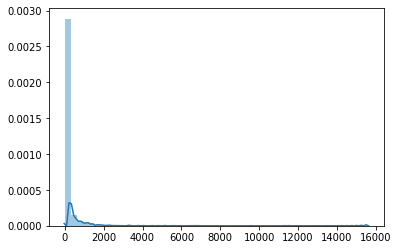

In [5]:
file = './genes.gtf'
db = read_gtf(file)
id = db['gene_id']
start = db['start']
end = db['end']

lens = {}
for i in range(len(id)):
    lens[id[i]] = end[i] - start[i]

features = {}
f = open('feature_count.txt')
for line in f:
    list = line.split()
    features[list[0]] = int(list[1])
f.close()

scale = 0
for k, v in lens.items():
    features[k] /= v
    scale += features[k]

scale /= 1000000

print('per million scaling factor', scale)

for k, v in features.items():
    features[k] /= scale

cut = []
num = 0
threshold = 10
for k, v in features.items():
    if v >= threshold:
        cut.append(v)
        num += 1

print('Число экспрессирующихся генов: ,', num)
print('Процент экспрессирующихся генов: ,', num/len(lens)*100, '%')
s = sns.distplot([cut])
plt.show()


python ./SPAdes-3.14.0-Linux/bin/spades.py -o ./out --rna -1 ./data/SRR453566_1.fastq -2 ./data/SRR453566_2.fastq